In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score

# Decoding On LR Path

In [2]:
with open('pickles/09_buffer_token_decoding_on_lr_path.pkl', 'rb') as f:
    results = pickle.load(f)
lr_path_test_score = results['test_score']
dist_from_goal = results['dist_from_goal']

In [3]:
with open('pickles/09_buffer_token_decoding_inverse_action.pkl', 'rb') as f:
    results = pickle.load(f)
inverse_action_test_score = results['test_score']

In [4]:
results = {
    'label': [],
    'score': [],
    'layer': []
}
for l in range(3):
    scores = lr_path_test_score[l]
    results['label'].extend(['L-R Path']*len(scores))
    results['score'].extend(scores)
    results['layer'].extend([l]*len(scores))
    scores = inverse_action_test_score[l]
    results['label'].extend(['Inverse\nAction']*len(scores))
    results['score'].extend(scores)
    results['layer'].extend([l]*len(scores))

(np.float64(0.43), np.float64(1.048469387755102))


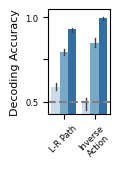

In [5]:
df = pd.DataFrame(results)
fig, ax = plt.subplots(figsize=(1.3, 1.8))
custom_palette = sns.color_palette("Blues", 3)
sns.barplot(
    x='label', y='score', hue='layer',
    palette=custom_palette, ax=ax,
    data=df, legend=False,
    err_kws={'linewidth': 1.}
)
plt.xlabel('')
plt.ylabel('Decoding Accuracy', fontsize=8)
plt.ylim(bottom=0.43)
plt.axhline(0.5, color='gray', linestyle='--')
plt.yticks([0.5, 0.75, 1.], ['0.5', '', '1.0'], fontsize=6)
plt.xticks(rotation=45, fontsize=6)
plt.tight_layout()
plt.savefig('figs/7b.png', dpi=300, transparent=True)
plt.savefig('figs/7b.pdf', dpi=300, transparent=True)
ylim = print(ax.get_ylim())
plt.show()

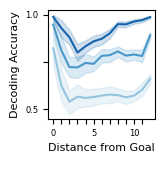

In [9]:
fig, ax = plt.subplots(figsize=(1.75, 1.85))
colors = plt.colormaps['Blues'](np.linspace(0.4, 1, len(lr_path_test_score)))

def boxcar_smooth(y, window_size):
    # Create the boxcar kernel
    kernel = np.ones(window_size) / window_size
    # Apply convolution for smoothing
    y_smooth = np.convolve(y, kernel, mode='same')
    # Fix edge effects
    y_smooth[:window_size//2] = y[:window_size//2]
    y_smooth[-window_size//2:] = y[-window_size//2:]
    return y_smooth

# Choose a window size for smoothing
window_size = 4  # Adjust as needed

for l in range(len(lr_path_test_score)-1):
    test_acc = lr_path_test_score[l]
    
    # Apply boxcar smoothing
    smoothed_acc = boxcar_smooth(test_acc, window_size)
    
    sns.lineplot(
        x=dist_from_goal, y=smoothed_acc, ax=ax,
        label=f'Layer {l}', color=colors[l],
        legend=None
    )

ax.set_ylabel('Decoding Accuracy', fontsize=8)
ax.set_xlabel('Distance from Goal\n', fontsize=8)
plt.xticks(np.arange(12), [0]+['']*4 + [5] + ['']*4 + [10] + [''], fontsize=6)
plt.yticks([0.5, 0.75, 1.], ['0.5', '', '1.0'], fontsize=6)
plt.ylim(ylim)
plt.tight_layout()
plt.savefig('figs/7d.png', transparent=True, dpi=300)
plt.savefig('figs/7d.pdf', transparent=True, dpi=300)
plt.show()

# Value Decoding by Action Distance

In [21]:
with open('pickles/09_query_token_decoding_q_value_dist.pkl', 'rb') as f:
    results = pickle.load(f)

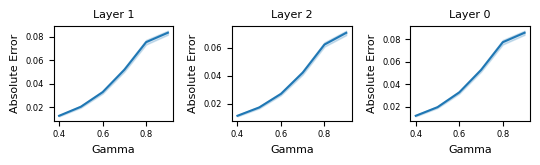

In [29]:
fig = plt.figure(figsize=(5.5, 1.75))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
axs = [fig.add_subplot(gs[:,i]) for i in range(3)]

for layer in range(3):
    _results = {'xs': [], 'ys': []}
    for idx, gamma in enumerate(results['gamma']):
        y = results['test_score'][idx][layer]
        _results['xs'].extend([gamma]*len(y))
        _results['ys'].extend(y)
    sns.lineplot(x='xs', y='ys', data=_results, ax=axs[layer-1])
    axs[layer-1].set_xlabel('Gamma', fontsize=8)
    axs[layer-1].set_ylabel('Absolute Error', fontsize=8)
    axs[layer-1].set_title(f'Layer {layer}', fontsize=8)
    axs[layer-1].tick_params(axis='both', which='major', labelsize=6)
plt.tight_layout()
plt.savefig('figs_app/K_19D.png', transparent=True, dpi=300)
plt.savefig('figs_app/K_19D.pdf', transparent=True, dpi=300)
plt.show()


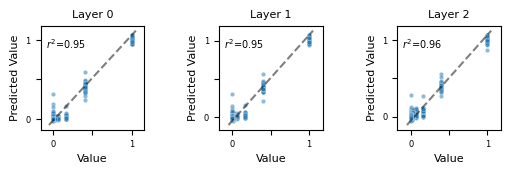

In [33]:
fig = plt.figure(figsize=(5.5, 1.75))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
axs = [fig.add_subplot(gs[:,i]) for i in range(3)]

for layer in range(3):
    ax = axs[layer]
    y = results['test_y'][0][layer]
    pred_y = results['test_pred'][0][layer]
    im = sns.scatterplot(x=y, y=pred_y, ax=ax, s=10, alpha=0.5)
    ax.set_aspect('equal', 'box')
    ax.set_box_aspect(1)
    ax.set_xticks([0, 0.5, 1.], labels=[r'0', '', r'1'], fontsize=6)
    ax.set_yticks([0, 0.5, 1.], labels=[r'0', '', r'1'], fontsize=6)
    for spine in ax.spines.values():
        spine.set_visible(True)
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Predicted Value', fontsize=8)
    ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--', alpha=0.5)
    ax.set_title(f'Layer {layer}', fontsize=8)
    r2 = r2_score(y, pred_y)
    ax.text(0.05, 0.9, f'$r^2$={r2:.2f}', transform=ax.transAxes, fontsize=7, ha='left', va='top')
plt.tight_layout()
plt.savefig('figs_app/K_19E.png', transparent=True, dpi=300)
plt.savefig('figs_app/K_19E.pdf', transparent=True, dpi=300)
plt.show()

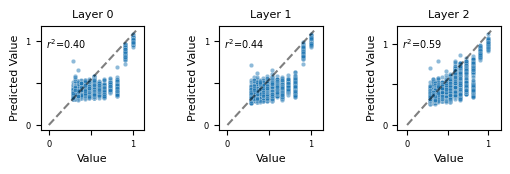

In [34]:
fig = plt.figure(figsize=(5.5, 1.75))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
axs = [fig.add_subplot(gs[:,i]) for i in range(3)]

for layer in range(3):
    ax = axs[layer]
    y = results['test_y'][-1][layer]
    pred_y = results['test_pred'][-1][layer]
    im = sns.scatterplot(x=y, y=pred_y, ax=ax, s=10, alpha=0.5)
    ax.set_aspect('equal', 'box')
    ax.set_box_aspect(1)
    ax.set_xticks([0, 0.5, 1.], labels=[r'0', '', r'1'], fontsize=6)
    ax.set_yticks([0, 0.5, 1.], labels=[r'0', '', r'1'], fontsize=6)
    for spine in ax.spines.values():
        spine.set_visible(True)
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Predicted Value', fontsize=8)
    ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--', alpha=0.5)
    ax.set_title(f'Layer {layer}', fontsize=8)
    r2 = r2_score(y, pred_y)
    ax.text(0.05, 0.9, f'$r^2$={r2:.2f}', transform=ax.transAxes, fontsize=7, ha='left', va='top')
plt.tight_layout()
plt.savefig('figs_app/K_19F.png', transparent=True, dpi=300)
plt.savefig('figs_app/K_19F.pdf', transparent=True, dpi=300)
plt.show()